In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
!ls

 combined_data					       Modelling.ipynb
'Concat Data.ipynb'				       Untitled.ipynb
'flat_without_missint_test1 (1).csv'		       which_horse
'flat_without_missint_test1 (1).csv:Zone.Identifier'  'Whose_Horse . csv'
'Horse Model Data - raw_data.csv'		      'Whose Horse . csv.zip'
'Horse Model Data - raw_data.csv:Zone.Identifier'


In [3]:
df = pd.read_csv('flat_without_missint_test1 (1).csv')

In [27]:
df.corr()

,Unnamed: 0,meeting_id,event_number,distance,distance_raw_furlongs,race_class_normalised,total_prize_money,track_condition,race_type,track_type,...,run_4_win_lose,run_4_race_type,run_4_race_class_normalised,run_4_final_rating_int,run_4_raw_post_race_rating_int,run_5_race_type,run_5_win_lose,run_5_dsr,run_5_race_class_normalised,run_5_raw_post_race_rating_int
Unnamed: 0,1.000000,0.950699,-0.036102,-0.021506,-0.021521,-0.010392,0.045431,-0.038432,-0.015967,0.054614,...,0.007862,-0.009935,-0.010282,-0.050534,0.005272,-0.008343,0.005099,-0.037854,-0.008309,0.003239
meeting_id,0.950699,1.000000,-0.053186,-0.020122,-0.020183,-0.013465,0.047760,-0.070819,-0.014958,0.078294,...,0.010966,-0.012547,-0.011759,-0.040495,0.010269,-0.010513,0.007691,-0.040415,-0.009201,0.007146
event_number,-0.036102,-0.053186,1.000000,0.234736,0.234664,-0.127997,-0.036315,0.008401,0.203292,0.012365,...,0.006564,-0.142930,-0.131068,-0.001874,0.000457,-0.140894,0.003720,0.035263,-0.127033,-0.004559
distance,-0.021506,-0.020122,0.234736,1.000000,0.999974,0.012543,0.028611,-0.004232,0.520512,0.041477,...,0.028028,0.046292,0.036241,0.100570,0.125891,0.035541,0.032669,0.134794,0.031820,0.125643
distance_raw_furlongs,-0.021521,-0.020183,0.234664,0.999974,1.000000,0.012505,0.028845,-0.003481,0.520425,0.040577,...,0.028058,0.046149,0.036075,0.100614,0.125871,0.035379,0.032677,0.134737,0.031652,0.125613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
run_5_race_type,-0.008343,-0.010513,-0.140894,0.035541,0.035379,0.574733,-0.045454,-0.059225,0.271396,0.086671,...,-0.045100,0.882516,0.839354,-0.001869,-0.000013,1.000000,-0.007271,0.187023,0.861952,0.062124
run_5_win_lose,0.005099,0.007691,0.003720,0.032669,0.032677,-0.043207,0.111520,-0.047630,0.025655,0.060454,...,0.095780,-0.009209,-0.039778,0.211327,0.223303,-0.007271,1.000000,0.063913,-0.007625,0.320081
run_5_dsr,-0.037854,-0.040415,0.035263,0.134794,0.134737,0.096765,0.059383,-0.063728,0.101593,0.078542,...,0.030334,0.170481,0.208272,0.120393,0.128546,0.187023,0.063913,1.000000,0.225984,0.171665
run_5_race_class_normalised,-0.008309,-0.009201,-0.127033,0.031820,0.031652,0.511404,-0.052684,-0.056363,0.231572,0.081464,...,-0.034098,0.760541,0.839390,-0.023541,-0.023405,0.861952,-0.007625,0.225984,1.000000,0.021283


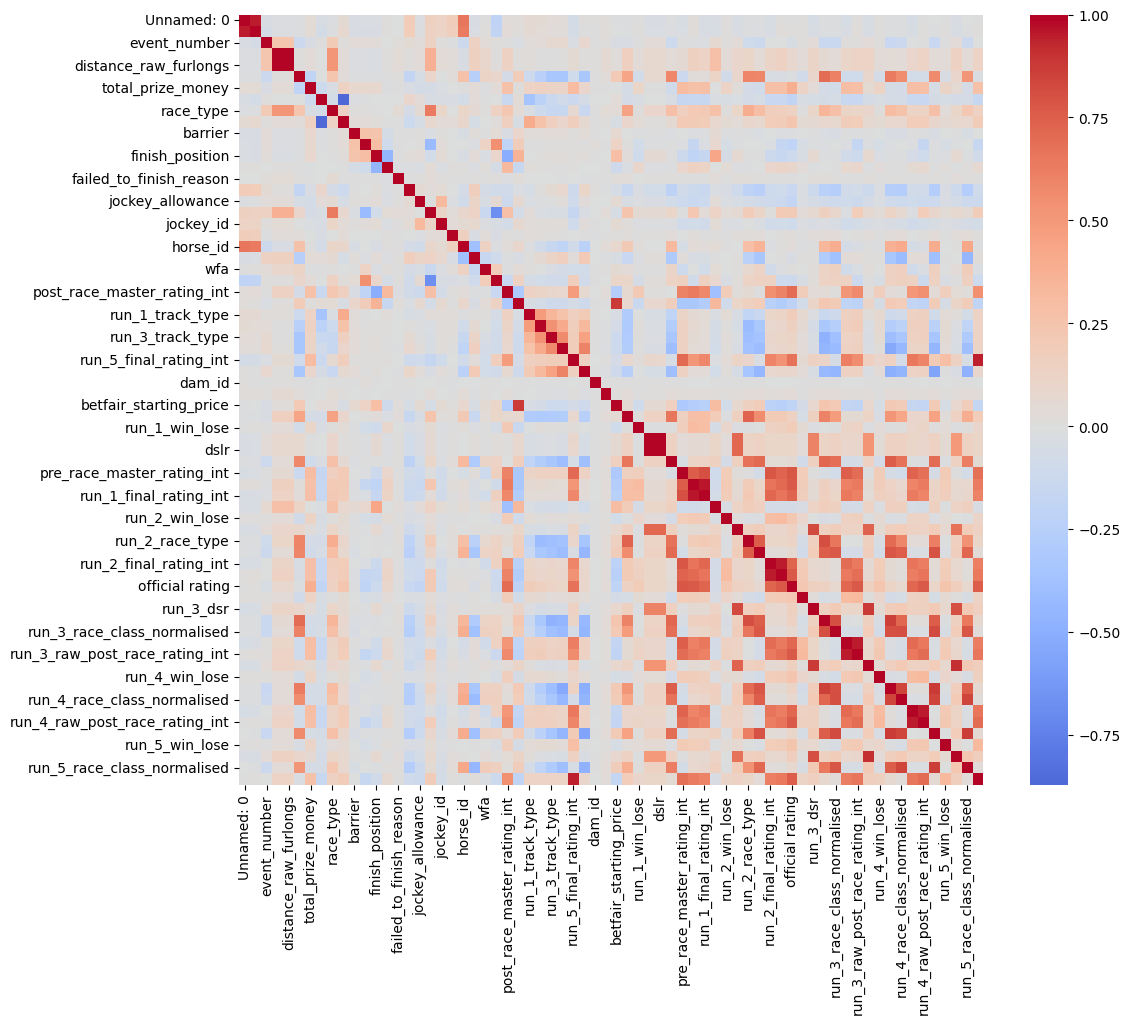

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(correlation_matrix, center=0, cmap='coolwarm', fmt=".2f")
plt.show()

In [26]:
# # YOUR CODE HERE
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()


NameError: name 'correlation_matrix' is not defined

In [ ]:
# # Renaming the columns
# corr_df.columns = ['feature_1','feature_2', 'correlation']

# # Remove "self correlations"
# no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
# corr_df = corr_df[no_self_correlation]

In [ ]:
# corr_df

In [ ]:
# # Computing the absolute correlation
# corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

In [5]:
df.columns

Index(['Unnamed: 0', 'meeting_id', 'date', 'event_number', 'distance',
       'distance_raw_furlongs', 'race_class_normalised', 'total_prize_money',
       'track_condition', 'race_type', 'track_type', 'barrier', 'number',
       'finish_position', 'win_or_lose', 'failed_to_finish_reason', 'gear',
       'jockey_allowance', 'handicap_weight', 'jockey_id', 'tainer_id',
       'horse_id', 'sire', 'dam', 'age', 'birth_date', 'wfa',
       'weight_adjustment', 'post_race_master_rating_int', 'starting_price',
       'run_1_track_type', 'run_2_track_type', 'run_3_track_type',
       'run_4_track_type', 'run_5_final_rating_int', 'run_5_track_type',
       'dam_id', 'sire_id', 'betfair_starting_price', 'run_1_race_type',
       'run_1_win_lose', 'run_1_dsr', 'dslr', 'run_1_race_class',
       'pre_race_master_rating_int', 'run_1_raw_post_race_rating_int',
       'run_1_final_rating_int', 'margin', 'run_2_win_lose', 'run_2_dsr',
       'run_2_race_type', 'run_2_race_class_normalised',
       'r

In [6]:
df['finish_position']

0         2.0
1         2.0
2         7.0
3         1.0
4         8.0
         ... 
282001    9.0
282002    4.0
282003    5.0
282004    5.0
282005    7.0
Name: finish_position, Length: 282006, dtype: float64

In [ ]:
#need to remove finish_position, failed_to_finish, failed_to_finish_reason, win_or_lose

In [15]:
X.dtypes

Unnamed: 0                          int64
meeting_id                          int64
date                               object
event_number                        int64
distance                            int64
                                   ...   
run_5_race_type                   float64
run_5_win_lose                    float64
run_5_dsr                         float64
run_5_race_class_normalised       float64
run_5_raw_post_race_rating_int    float64
Length: 72, dtype: object

In [8]:
X = df.copy()

In [16]:
X.drop(['finish_position', 'failed_to_finish_reason', 'win_or_lose'], axis = 1, inplace = True)

In [17]:
X.columns

Index(['Unnamed: 0', 'meeting_id', 'date', 'event_number', 'distance',
       'distance_raw_furlongs', 'race_class_normalised', 'total_prize_money',
       'track_condition', 'race_type', 'track_type', 'barrier', 'number',
       'gear', 'jockey_allowance', 'handicap_weight', 'jockey_id', 'tainer_id',
       'horse_id', 'sire', 'dam', 'age', 'birth_date', 'wfa',
       'weight_adjustment', 'post_race_master_rating_int', 'starting_price',
       'run_1_track_type', 'run_2_track_type', 'run_3_track_type',
       'run_4_track_type', 'run_5_final_rating_int', 'run_5_track_type',
       'dam_id', 'sire_id', 'betfair_starting_price', 'run_1_race_type',
       'run_1_win_lose', 'run_1_dsr', 'dslr', 'run_1_race_class',
       'pre_race_master_rating_int', 'run_1_raw_post_race_rating_int',
       'run_1_final_rating_int', 'margin', 'run_2_win_lose', 'run_2_dsr',
       'run_2_race_type', 'run_2_race_class_normalised',
       'run_2_final_rating_int', 'run_2_raw_post_race_rating_int',
       'of

In [18]:
y = df.copy()

0          3668
1          3668
2          3668
3          3668
4          3668
          ...  
282001    37996
282002    37996
282003    37996
282004    37996
282005    37996
Name: meeting_id, Length: 282006, dtype: int64

In [19]:
y = y['win_or_lose']

In [12]:
y

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
282001    0.0
282002    0.0
282003    0.0
282004    0.0
282005    0.0
Name: win_or_lose, Length: 282006, dtype: float64

In [13]:
model = LinearRegression()

In [14]:
data_model = cross_val_score(model, X, y, cv=10)
data_model_score = base_model.mean()

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_base.py", line 578, in fit
    X, y = self._validate_data(
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1192, in check_X_y
    X = check_array(
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py", line 951, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '2019-06-26'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_base.py", line 578, in fit
    X, y = self._validate_data(
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1192, in check_X_y
    X = check_array(
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py", line 951, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/home/tomi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '2020-07-20'


In [ ]:
X.select_dtypes(include =['object'])

In [ ]:
X['sire'].unique()

In [ ]:
X['dam'].unique()

In [ ]:
X['age']

In [ ]:
X['date'][0]-X['birth_date'][0]

In [ ]:
X['date']